In [40]:
# import the dataset
import pandas as pd
Data = pd.read_csv('Desktop/desktop on 10 sep 2020/Complete-Deep-Learning-master/ANN/Churn_Modelling.csv')
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
# Remove unwanted features from Data
Data1 = Data.drop(['Geography','Gender'],axis=1)
Data1.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0


In [43]:
# get dummies for feature 'Geography' and 'Gender'
Geography_dummy = pd.get_dummies(Data['Geography'], drop_first=False)
Gender_dummy = pd.get_dummies(Data['Gender'], drop_first=False)

In [44]:
# Split the data into X,y
X = Data1.iloc[:,3:11]
y = Data1.iloc[:,11]

In [45]:
# Append dummies to X
X1 = pd.concat([X,Geography_dummy,Gender_dummy],axis=1)
X1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [46]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2,random_state=0)

In [47]:
# Scale the X data
import sklearn
from sklearn.preprocessing import StandardScaler
X_train_SS = sklearn.preprocessing.StandardScaler().fit_transform(X_train)
X_test_SS = sklearn.preprocessing.StandardScaler().fit_transform(X_test)

In [48]:
# Import necessary keras library to make 'ANN'
import keras
from keras.models import Sequential
from keras.layers import Dense
# Initialize the ANN
Classifier = Sequential() 
# Define input and first hidden layer (* For Relu Acivation function , he_uniform - kernel initializer is always recommended)
Classifier.add(Dense(units=7, kernel_initializer='he_uniform', activation='relu', input_dim=13))
#Adding Second hidden layer 
Classifier.add(Dense(units=7, kernel_initializer='he_uniform', activation='relu'))
#Adding output layer
Classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
# output layer is usually designed to go with 'sigmoid' activation and glorot_uniform as kernel_initializer
#Compile the ANN
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# 'Adam Optimizer is found best so far and loss function is considered as binary_crossentropy for classification pbms'

In [12]:
#Fitting the ANN to the training data
model_ANN = Classifier.fit(X_train_SS,y_train,validation_split=0.33,batch_size=10, epochs = 100)
# Validation Split is a hyperparameter can be used to validate the data exclusively.
# 1 Epoch represents 1 pair of forward and backpropagation of NN to assign weight updation.
# Batch size represents grouping the data without bias which minimize the computation instability.

Epoch 1/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5125 - accuracy: 0.7598 - val_loss: 0.4699 - val_accuracy: 0.7959
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4593 - accuracy: 0.7966 - val_loss: 0.4531 - val_accuracy: 0.7952
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 0.7979 - val_loss: 0.4431 - val_accuracy: 0.8005
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.8050 - val_loss: 0.4361 - val_accuracy: 0.8076
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4220 - accuracy: 0.8128 - val_loss: 0.4306 - val_accuracy: 0.8076
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4158 - accuracy: 0.8201 - val_loss: 0.4256 - val_accuracy: 0.8137
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4116 - accuracy: 0.8259 - val_loss: 0.4217 - val_accuracy: 0.8126

In [91]:
# Making the predictions and evaluating the model
# 1.predicting the testset results
y_pred = Classifier.predict(X_test)
y_pred_for_test_set = (y_pred > 0.5)


#2.Evaluating confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_N))


#3.Evaluating Accuracy_score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_N , y_test))

#4.Evaluating Classification report
from sklearn.metrics import classification_report
print(classification_report(y_pred_N, y_test))


[[1595    0]
 [ 405    0]]
0.7975
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.80      2000
   macro avg       0.50      0.40      0.44      2000
weighted avg       1.00      0.80      0.89      2000



C:\New\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\New\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\New\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# To get to know model history
print(model_ANN.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

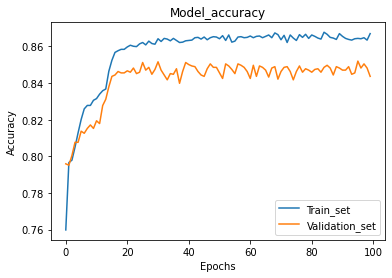

In [17]:
# Now summarize the history for accuracy 
import matplotlib.pyplot as plt
plt.plot(model_ANN.history['accuracy'])
plt.plot(model_ANN.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train_set' , 'Validation_set'], loc='lower right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

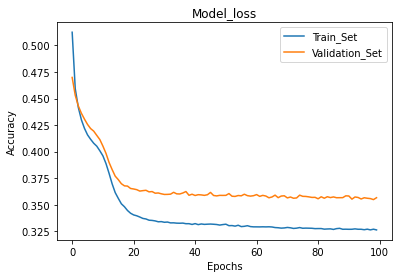

In [19]:
# Now Summarize the history for loss
plt.plot(model_ANN.history['loss'])
plt.plot(model_ANN.history['val_loss'])
plt.title('Model_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train_Set','Validation_Set'],loc='upper right')
plt.show